In [1]:
import time
import os
import re
import datetime
import glob

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import japanize_matplotlib

import plotly.express as px
import plotly.graph_objects as go

# from sklearn.model_selection import train_test_split
# from sklearn.linear_model import LogisticRegression
# from sklearn.metrics import accuracy_score

# ディビジョンを日本語に
def div_ja(division):
    sex = '男子' if division[-1]=='m' else '女子'
    return 'V{0}{1}'.format(division[1], sex)

In [2]:
def stats_calc(df):
    df['Set'] = df['Win_Set'] + df['Lose_Set']
    df['ASucc%'] = ((df['AP'] / df['AA']) * 100).round(1)
    df['AEff%'] = (((df['AP']-df['AE']) /
                     df['AA']) * 100).round(1)
    df['BASucc%'] = ((df['BAP'] / df['BAA']) * 100).round(1)
    df['AP/S'] = (df['AP'] / df['Set']).round(2)
    df['BP/S'] = (df['BP'] / df['Set']).round(2)
    df['SVEff%'] = ((df['SVP'] * 100 + df['SVx'] * 25 -
                    df['SVE'] * 25) / df['SVA']).round(1)
    df['RSucc%'] = (
        (df['Rx'] * 100 + df['Rg'] * 50) / df['RA']).round(1)
    return df

dict_att_color = {
    'v1_m':{
        'ジェイテクトSTINGS': '#b2b2b2',
        'JTサンダーズ広島': '#00cb65',
        'VC長野トライデンツ': '#980000',
        '東レアローズ': '#0000ff',
        '堺ブレイザーズ': '#ffff00',
        '大分三好ヴァイセアドラー': '#3232ff',
        'サントリーサンバーズ': '#ff003f',
        'FC東京': '#0032cb',
        'パナソニックパンサーズ': '#000065',
        'ウルフドッグス名古屋': '#000000'
    },
    'v2_m':{
        '警視庁フォートファイターズ': '#b2b2b2',
        '千葉ZELVA': '#9932ff',
        'トヨタ自動車サンホークス': '#004c98',
        '奈良ドリーマーズ': '#006532',
        'ヴォレアス北海道': '#cb0032',
        '埼玉アザレア': '#cb0098',
        'サフィルヴァ北海道': '#ffff00',
        'ヴィアティン三重': '#ff3f00',
        '大同特殊鋼レッドスター': '#984c00',
        '兵庫デルフィーノ': '#007fff',
        '富士通カワサキレッドスピリッツ': '#ff0000',
        'クボタスピアーズ': '#00ffff',
        'つくばユナイテッドSunGAIA': '#009872',
        'きんでんトリニティーブリッツ': '#00984c',
        '東京ヴェルディ': '#009826',        
    },
    'v3_m':{
        '長野GaRons': '#003fff',
        'アイシンティルマーレ': '#3299ff',
        'トヨタモビリティ東京スパークル': '#ff3232',
        '近畿クラブスフィーダ': '#000000'
    },
    'v1_w':{
        '東レアローズ':'#0018fa', 
        'ヴィクトリーナ姫路':'#fa00bd',
        'トヨタ車体クインシーズ':'#0a1899',
        'JTマーヴェラス':'#00b348',
        'NECレッドロケッツ': '#ff003f',
        'KUROBEアクアフェアリーズ': '#00ebe3',
        'デンソーエアリービーズ': '#ff3232',
        'PFUブルーキャッツ': '#1000fa',
        '久光スプリングス': '#7ce01f',
        '日立Astemoリヴァーレ': '#8b00bb',
        '岡山シーガルズ': '#8adeff',
        '埼玉上尾メディックス': '#000000'
    },
    'v2_w':{
        'ブレス浜松': '#32ccff',
        'JAぎふリオレーナ': '#99e5ff',
        'プレステージ・インターナショナルアランマーレ': '#ff3f00',
        '千葉エンゼルクロス': '#980026',
        '群馬銀行グリーンウイングス': '#00cb65',
        'リガーレ仙台': '#ff0000',
        'ルートインホテルズブリリアントアリーズ': '#ff99e5',
        'GSS東京サンビームズ': '#269800',
        'フォレストリーヴズ熊本': '#00984c',
        '大野石油広島オイラーズ': '#3265ff'
    }
}

In [3]:
division = 'v1_w'
paths = glob.glob('../database/{}/teamdb_*'.format(division))
# paths = paths[-5:]
print(paths)

['../database/v1_w\\teamdb_1999-00_regular.csv', '../database/v1_w\\teamdb_2000-01_regular.csv', '../database/v1_w\\teamdb_2001-02_regular.csv', '../database/v1_w\\teamdb_2002-03_regular.csv', '../database/v1_w\\teamdb_2003-04_regular.csv', '../database/v1_w\\teamdb_2004-05_regular.csv', '../database/v1_w\\teamdb_2005-06_regular.csv', '../database/v1_w\\teamdb_2006-07_regular.csv', '../database/v1_w\\teamdb_2007-08_regular.csv', '../database/v1_w\\teamdb_2008-09_regular.csv', '../database/v1_w\\teamdb_2009-10_regular.csv', '../database/v1_w\\teamdb_2010-11_regular.csv', '../database/v1_w\\teamdb_2011-12_regular.csv', '../database/v1_w\\teamdb_2012-13_regular.csv', '../database/v1_w\\teamdb_2013-14_regular.csv', '../database/v1_w\\teamdb_2014-15_regular.csv', '../database/v1_w\\teamdb_2015-16_regular.csv', '../database/v1_w\\teamdb_2016-17_regular.csv', '../database/v1_w\\teamdb_2017-18_regular.csv', '../database/v1_w\\teamdb_2018-19_regular.csv', '../database/v1_w\\teamdb_2019-20_regul

In [4]:
division = 'v1_m'
year = '2021-22_regular'
# Database
# player_db_path =  '../database/{0}/playerdb_{1}.csv'.format(division,year)
# team_db_path =  '../database/{0}/teamdb_{1}.csv'.format(division,year)
# simple
player_db_path = '../{0}/{1}/yearly_all.csv'.format(year,division)
# player_db = pd.read_csv(player_db_path)
player_db = pd.read_csv(player_db_path,encoding='cp932')
# team_db = pd.read_csv(team_db_path)
player_db.head()

,名前,チーム,背番号,得セット,失セット,勝敗,出場数,アタック打数,アタック得点,アタック失点,...,サーブ効果,受数,サーブレシーブ成功・優,サーブレシーブ成功・良,総得点,バックアタック決定率,アタックセット平均,ブロックセット平均,サーブ効果率,サーブレシーブ成功率
0,エスペホマーク,FC東京,15,37,69,8,81,506,188,42,...,52,482,183,139,224,49.3,2.32,0.31,3.6,52.4
1,エドガートーマス,JTサンダーズ広島,6,65,67,15,132,1509,750,111,...,126,1,0,0,837,55.5,5.68,0.30,9.2,0.0
2,エバデダンラリー,パナソニックパンサーズ,23,40,17,12,28,48,31,2,...,17,11,5,3,41,NaN,1.11,0.36,2.3,59.1
3,エメルソンロドリゲス,大分三好ヴァイセアドラー,2,29,89,6,96,793,356,84,...,94,1,0,0,394,46.6,3.71,0.09,9.2,0.0
4,クビアクミハウ,パナソニックパンサーズ,13,84,43,24,127,940,432,76,...,135,835,366,209,499,47.7,3.40,0.31,8.6,56.3


In [5]:
player_db.columns

Index(['名前', 'チーム', '背番号', '得セット', '失セット', '勝敗', '出場数', 'アタック打数', 'アタック得点',
       'アタック失点', 'アタック決定率', 'アタック効果率', 'バックアタック打数', 'バックアタック得点', 'バックアタック失点',
       'ブロック得点', 'サーブ打数', 'サーブ得点', 'サーブ失点', 'サーブ効果', '受数', 'サーブレシーブ成功・優',
       'サーブレシーブ成功・良', '総得点', 'バックアタック決定率', 'アタックセット平均', 'ブロックセット平均', 'サーブ効果率',
       'サーブレシーブ成功率'],
      dtype='object')

In [6]:
dict_att_color[division]

{'ジェイテクトSTINGS': '#b2b2b2',
 'JTサンダーズ広島': '#00cb65',
 'VC長野トライデンツ': '#980000',
 '東レアローズ': '#0000ff',
 '堺ブレイザーズ': '#ffff00',
 '大分三好ヴァイセアドラー': '#3232ff',
 'サントリーサンバーズ': '#ff003f',
 'FC東京': '#0032cb',
 'パナソニックパンサーズ': '#000065',
 'ウルフドッグス名古屋': '#000000'}

In [7]:
team_db_total = team_db.groupby('Team').sum()
team_db_total[['Win_Set', 'Lose_Set']]

NameError: name 'team_db' is not defined

In [ ]:
team_db['Set'] = team_db['Win_Set'] + team_db['Lose_Set']

In [ ]:
player_db_total = player_db.groupby('Player').sum()
player_db_total = stats_calc(player_db_total)
player_db_total

In [26]:
team = 'サントリーサンバーズ'
# color = 'red'
# team_player = player_db[player_db['Team']==team]
# team_player_total = team_player.groupby('Player').sum()
# team_player_total = stats_calc(team_player_total)
# team_player_total['Team'] = team
team_player_total = player_db[(player_db['チーム']==team)&(player_db['アタック打数']>=50)]
# team_player_total = player_db[(player_db['アタック打数']>=100)]
# team_player_total = player_db[(player_db['チーム']==team)]
# player = team_player_total.index
player = list(team_player_total['名前'])
print(player)
color = dict_att_color[division][team]
print(color)
# team_player_total['Color'] = color
team_player_total

['デアルマスアライン', 'ムセルスキードミトリー', '小川猛', '小野遥輝', '彭世坤', '柳田将洋', '秦耕介', '藤中謙也', '鍬田憲伸']
#ff003f


,名前,チーム,背番号,得セット,失セット,勝敗,出場数,アタック打数,アタック得点,アタック失点,...,サーブ効果,受数,サーブレシーブ成功・優,サーブレシーブ成功・良,総得点,バックアタック決定率,アタックセット平均,ブロックセット平均,サーブ効果率,サーブレシーブ成功率
8,デアルマスアライン,サントリーサンバーズ,7,74,47,23,99,575,295,32,...,87,61,17,17,337,58.4,2.98,0.21,10.7,41.8
14,ムセルスキードミトリー,サントリーサンバーズ,13,48,25,15,71,784,425,81,...,81,3,0,1,481,48.8,5.99,0.39,9.8,16.7
65,小川猛,サントリーサンバーズ,18,77,45,24,57,52,33,4,...,25,4,1,2,42,NaN,0.58,0.16,6.2,50.0
72,小野遥輝,サントリーサンバーズ,3,80,50,25,115,276,158,13,...,79,21,12,5,230,NaN,1.37,0.50,4.2,69.0
92,彭世坤,サントリーサンバーズ,6,71,42,22,109,256,158,16,...,105,13,4,3,233,NaN,1.45,0.59,6.8,42.3
106,柳田将洋,サントリーサンバーズ,8,68,46,21,106,640,333,35,...,127,467,153,120,401,58.6,3.14,0.19,13.3,45.6
139,秦耕介,サントリーサンバーズ,11,62,38,19,41,101,52,8,...,27,127,53,23,73,52.6,1.27,0.29,8.7,50.8
145,藤中謙也,サントリーサンバーズ,10,73,43,23,96,372,181,26,...,50,708,306,192,219,54.9,1.89,0.31,3.2,56.8
170,鍬田憲伸,サントリーサンバーズ,22,26,18,8,30,92,38,5,...,28,229,83,71,51,43.8,1.27,0.20,9.1,51.7


In [27]:
team_player_total.columns

Index(['名前', 'チーム', '背番号', '得セット', '失セット', '勝敗', '出場数', 'アタック打数', 'アタック得点',
       'アタック失点', 'アタック決定率', 'アタック効果率', 'バックアタック打数', 'バックアタック得点', 'バックアタック失点',
       'ブロック得点', 'サーブ打数', 'サーブ得点', 'サーブ失点', 'サーブ効果', '受数', 'サーブレシーブ成功・優',
       'サーブレシーブ成功・良', '総得点', 'バックアタック決定率', 'アタックセット平均', 'ブロックセット平均', 'サーブ効果率',
       'サーブレシーブ成功率'],
      dtype='object')

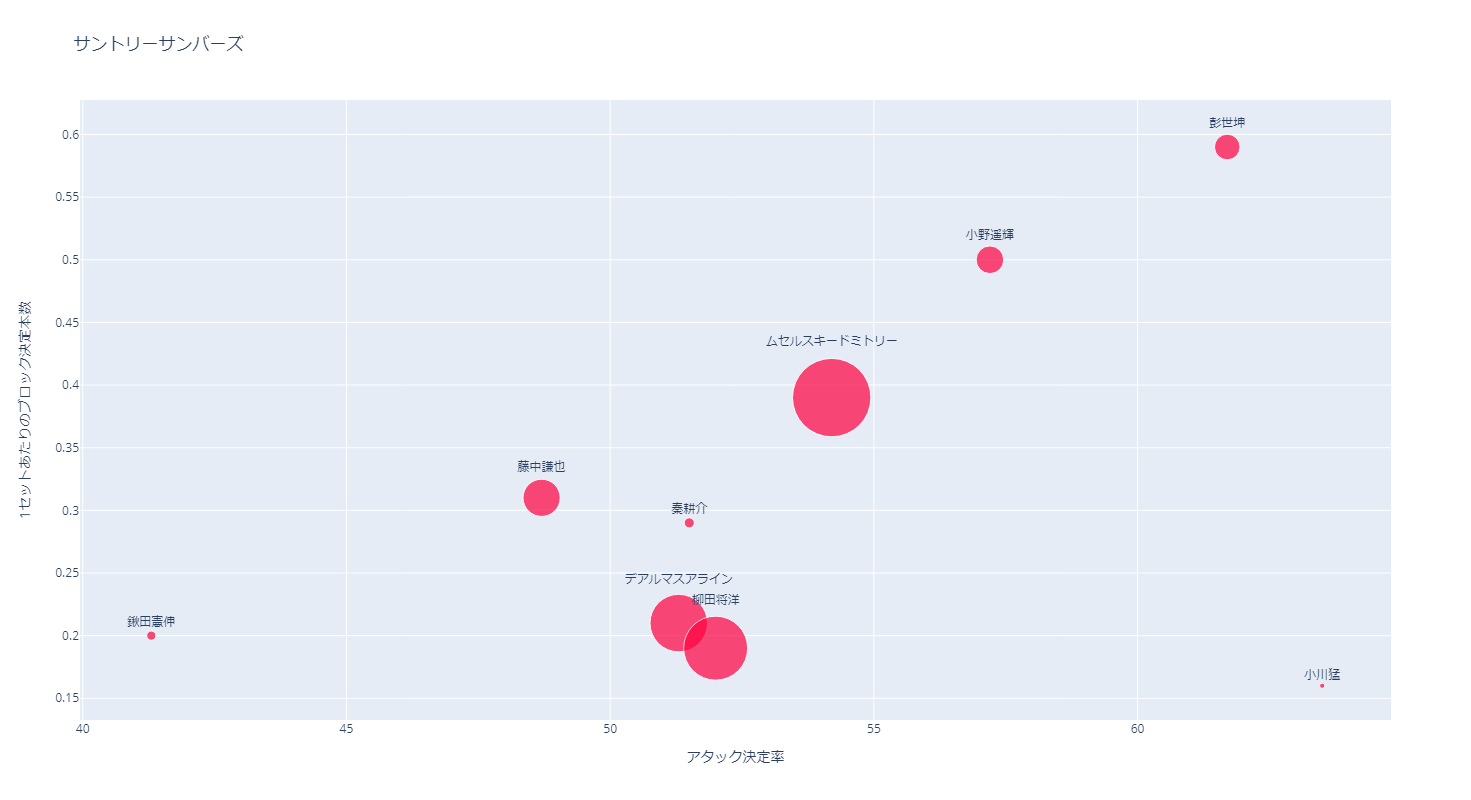

In [29]:
# fig = px.scatter(team_player_total,x='ASucc%',y='BP/S',color='Team',size='Set',color_discrete_map=dict_att_color[division])
fig = go.Figure()
fig.add_trace(
    go.Scatter(
#         x=team_player_total['ASucc%'],
#         y=team_player_total['BP/S'],
        x=team_player_total['アタック決定率'],
        y=team_player_total['ブロックセット平均'],

        mode='markers+text',
        marker={
#             'size': team_player_total['Set']*0.3,
            'size': team_player_total['アタック打数']*0.1,
            'symbol': 'circle',
            'color': dict_att_color[division][team]
#             'color': team,
        },
        text=player,
        textposition='top center',
    )
)
fig.update_layout(
    xaxis={'title': 'アタック決定率'},
    yaxis={'title': '1セットあたりのブロック決定本数'},
    hovermode='closest',
    hoverlabel_align='right',
    title='{}'.format(team),
    width=1000,
    height=800,
#     xaxis_range=(30,65),
#     yaxis_range=(-0.01,1)
)
fig.write_image('test.jpg')
fig.show()

In [10]:
team_db_total = stats_calc(team_db_total)
team_db_total

NameError: name 'team_db_total' is not defined

In [11]:
team_db_main = team_db_total[['ASucc%', 'BASucc%', 'BP/S', 'SVEff%', 'RSucc%']]
team_db_main

NameError: name 'team_db_total' is not defined

In [12]:
index={
    "v1_m": [
        "サントリーサンバーズ","ウルフドッグス名古屋","パナソニックパンサーズ","東レアローズ",
        "堺ブレイザーズ","JTサンダーズ広島","ジェイテクトSTINGS","FC東京",
        "大分三好ヴァイセアドラー","VC長野トライデンツ"
    ],
    "v2_m": [
        "ヴォレアス北海道","富士通カワサキレッドスピリッツ","ヴィアティン三重", 
        "埼玉アザレア","サフィルヴァ北海道","大同特殊鋼レッドスター",
        "兵庫デルフィーノ","きんでんトリニティーブリッツ","つくばユナイテッドSunGAIA",
        "トヨタ自動車サンホークス","奈良ドリーマーズ","警視庁フォートファイターズ",
        "東京ヴェルディ","クボタスピアーズ","千葉ZELVA"
    ],
    "v3_m": [
        "アイシンティルマーレ","近畿クラブスフィーダ","長野GaRons","トヨタモビリティ東京スパークル"
    ],
    "v1_w": [
        "JTマーヴェラス","東レアローズ","久光スプリングス","NECレッドロケッツ",
        "埼玉上尾メディックス","デンソーエアリービーズ","日立Astemoリヴァーレ","PFUブルーキャッツ",
        "岡山シーガルズ","トヨタ車体クインシーズ","ヴィクトリーナ姫路","KUROBEアクアフェアリーズ"
    ],
    "v2_w": [
        "群馬銀行グリーンウィングス","ルートインホテルズブリリアントアリーズ","プレステージ・インターナショナルアランマーレ",
        "GSS東京サンビームズ","千葉エンゼルクロス","リガーレ仙台","ブレス浜松",
        "大野石油広島オイラーズ","JAぎふリオレーナ","フォレストリーブズ熊本"
    ]
}
team_db_main_std = team_db_main.apply(lambda x: (x-x.mean())/x.std()).reindex(index=index[division])
team_db_main_std

NameError: name 'team_db_main' is not defined

In [13]:
plt.figure(figsize=(8,6))
# sns.set(font_scale=2)
sns.heatmap(team_db_main_std, annot=True, cmap='bwr',vmax=2, vmin=-2)
plt.savefig('test.png', facecolor='white',bbox_inches="tight")
plt.show()

NameError: name 'team_db_main_std' is not defined

<Figure size 576x432 with 0 Axes>